In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
data.shape

(301, 9)

In [13]:
print(data.Fuel_Type.unique())
print(data.Seller_Type.unique())
print(data.Transmission.unique())
print(data.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [14]:
data.isna().sum().sum()

0

In [15]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [17]:
final_dataset= data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
final_dataset['Current_year']=2021
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [19]:
final_dataset['Number_Of_year']=final_dataset['Current_year'] - final_dataset['Year']

In [20]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Number_Of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [21]:
# Now I am going to drop the yerar and Current_year feature.
final_dataset.drop(['Year', 'Current_year'], axis=1, inplace=True)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [23]:
# Convert the categorical feature to numeric by the help of get_dummies function.
final_dataset = pd.get_dummies(final_dataset, drop_first=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [24]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_Of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


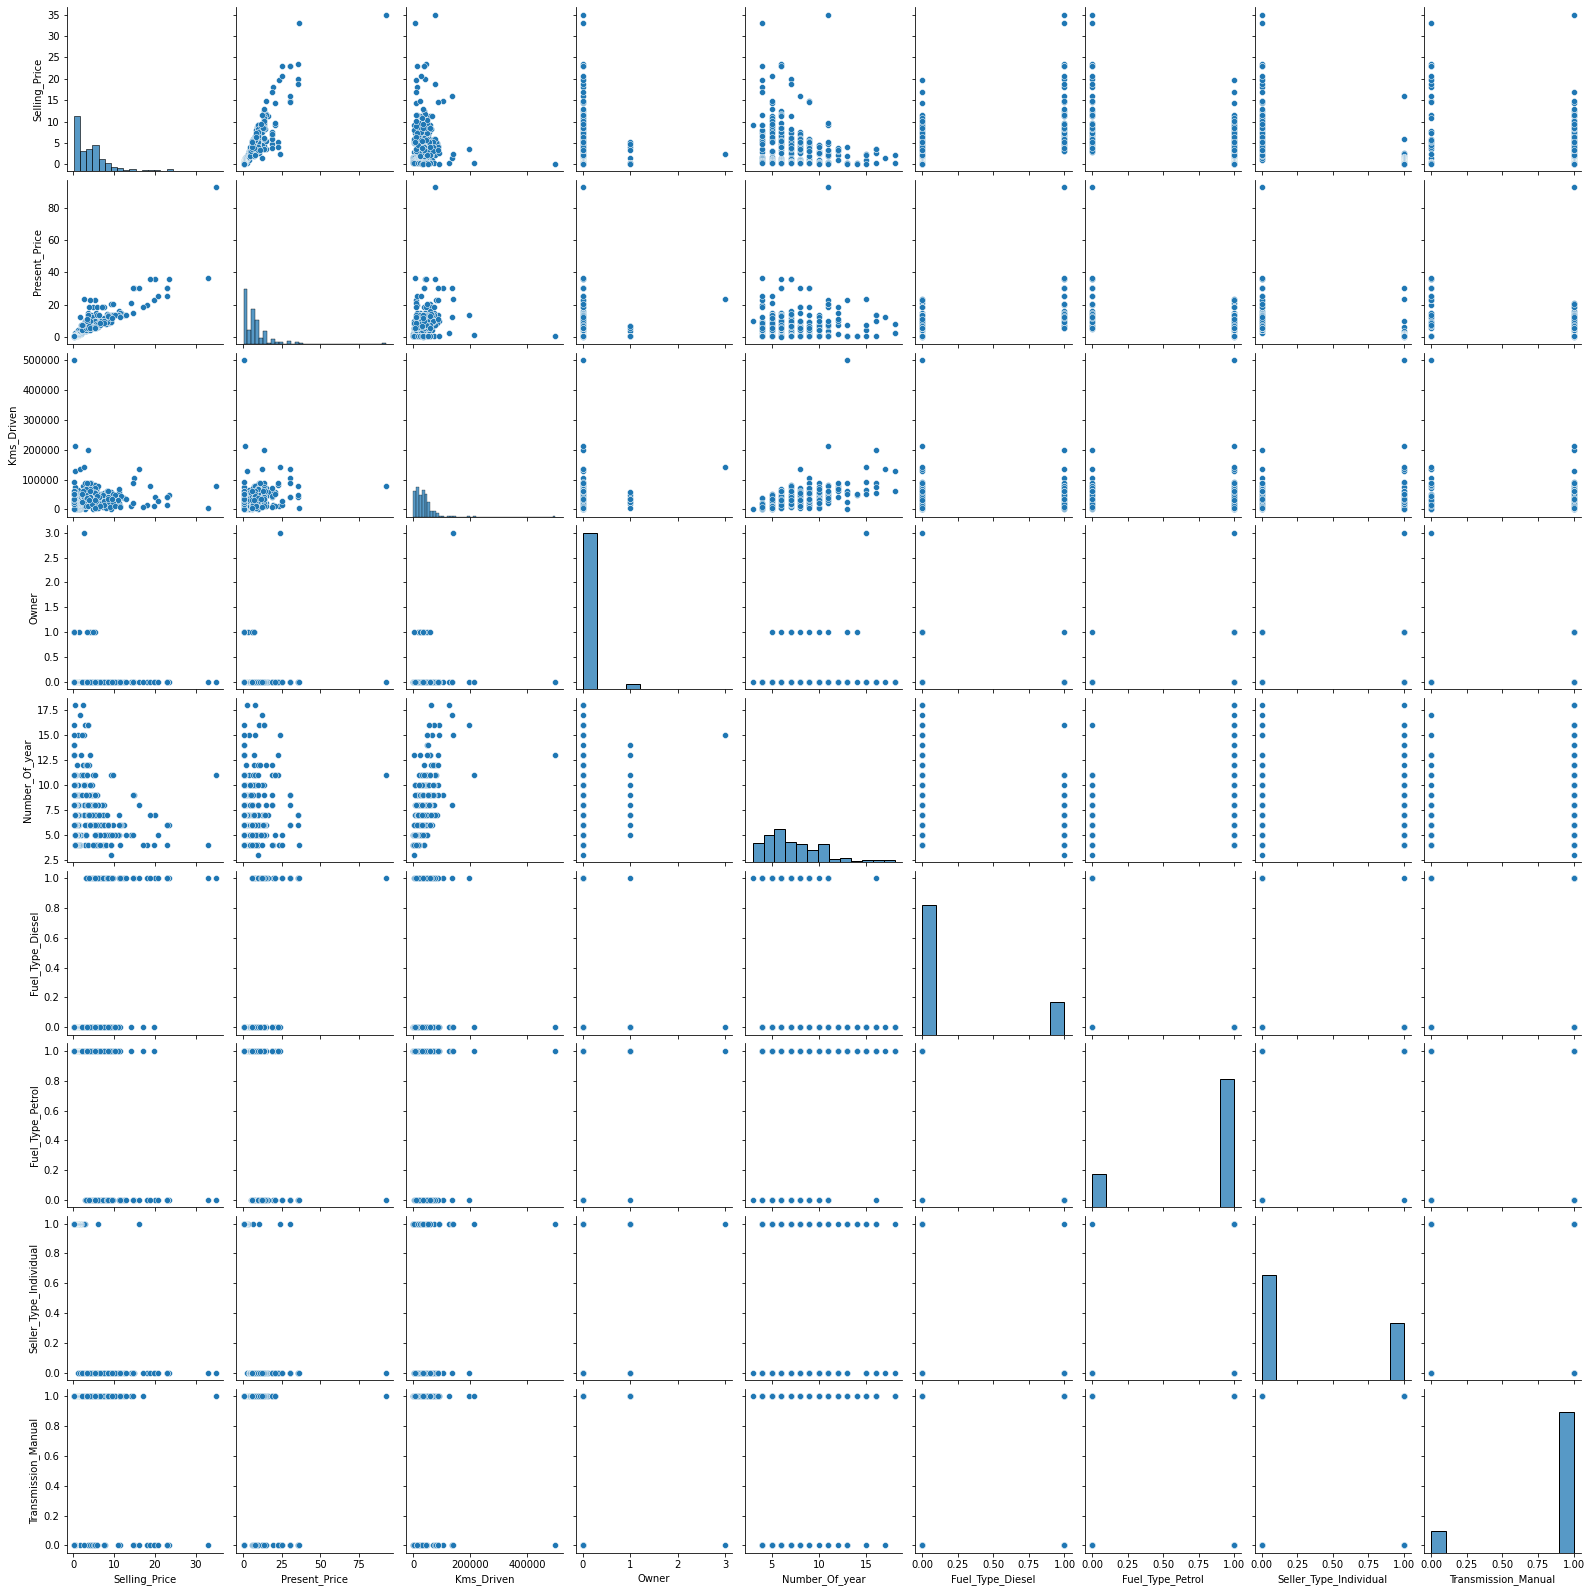

In [25]:
sns.pairplot(final_dataset)

<AxesSubplot:>

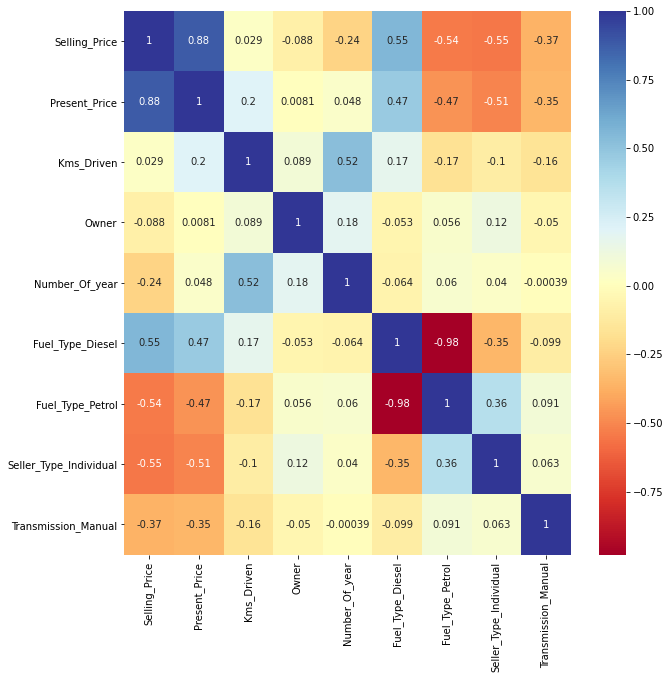

In [26]:
# Through heatmap

corrilation = final_dataset.corr()
top_corr_feature=corrilation.index
plt.figure(figsize=(10,10))
sns.heatmap(final_dataset[top_corr_feature].corr(), cmap='RdYlBu',annot=True)

In [27]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [28]:
#Sepperate the dataset into independent feature and dependent feature.
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [29]:
# check the feature importance 
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [31]:
x_train.head()

,Present_Price,Kms_Driven,Owner,Number_Of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
222,7.60,77632,0,7,1,0,0,1
283,11.80,9010,0,5,0,1,0,1
44,2.69,50000,0,9,0,1,0,1
245,9.40,71000,0,9,1,0,0,1
191,0.57,25000,1,9,0,1,1,1


In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [33]:
# Hyper tunning
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of leaves in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

#Minimu number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#Minimu number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [36]:
rf_random = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid,n_iter=10,
                               scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=1)

In [37]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   3.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   3.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

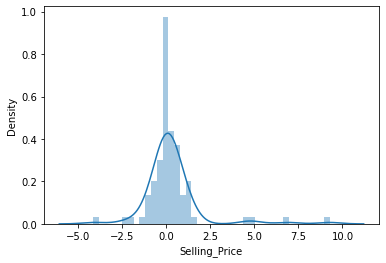

In [38]:
rfr_predict =rf_random.predict(x_test)
rfr_predict
sns.distplot(y_test-rfr_predict)

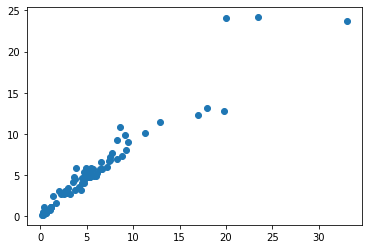

In [39]:
plt.scatter(y_test, rfr_predict)

In [40]:
from sklearn import metrics

In [41]:
print("MSE: ", metrics.mean_squared_error(y_test, rfr_predict))
print("MAE: ", metrics.mean_absolute_error(y_test, rfr_predict))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, rfr_predict)))

MSE:  2.589015695425951
MAE:  0.7842964923408412
RMSE:  1.6090418563312612


In [42]:
import pickle
file = open('randomForestRegressorModel.pkl', 'wb')
pickle.dump(rf_random, file)